# Project: Investigate a Dataset (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> The questions that is explored are:
1. What are the most popular genres over the years
2. What are the most popular movies based on popularity rating every year?

In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
#import MySQLdb as mysql
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
from IPython.display import display, HTML
import IPython.core.display as di

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [39]:
def read(filename):
    df = pd.read_csv(filename)

    return df

tmdb_df = read("tmdb-movies.csv")
print (tmdb_df.head())
tmdb_df.info()


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

### Data Cleaning 
#### check if there is duplicate

In [40]:
print (sum(tmdb_df.duplicated()))

1


#### Remve dulipcates

In [41]:
tmdb_df.drop_duplicates(inplace=True)

#### clean up the columns that is not interesting for this analysis

In [42]:
tmdb_df = tmdb_df[['id','original_title','release_year','cast','director','genres','popularity','budget_adj','revenue_adj']]
tmdb_df.head()

,id,original_title,release_year,cast,director,genres,popularity,budget_adj,revenue_adj
0,135397,Jurassic World,2015,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,32.985763,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,2015,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,28.419936,1.379999e+08,3.481613e+08
2,262500,Insurgent,2015,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,13.112507,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,2015,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,11.173104,1.839999e+08,1.902723e+09
4,168259,Furious 7,2015,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,9.335014,1.747999e+08,1.385749e+09


#### check null values

In [43]:
print (tmdb_df.isnull().sum())
print ('\ntotal rows: ')
len(tmdb_df.index)

id                 0
original_title     0
release_year       0
cast              76
director          44
genres            23
popularity         0
budget_adj         0
revenue_adj        0
dtype: int64

total rows: 


10865

#### drop movies which have null values in cast or director column

In [44]:
tmdb_df.dropna(inplace=True)
print (tmdb_df.isnull().sum())

print ('\ntotal rows: ')
len(tmdb_df.index)

id                0
original_title    0
release_year      0
cast              0
director          0
genres            0
popularity        0
budget_adj        0
revenue_adj       0
dtype: int64

total rows: 


10731

#### delete those movies which have '0' value in their budget_adj or revenue_adj

In [45]:
money_row = ['budget_adj', 'revenue_adj']
tmdb_df[money_row] = tmdb_df[money_row].replace(0, np.NaN)
tmdb_df.dropna(subset = money_row, inplace=True)

display(tmdb_df.head())

print ('\ntotal rows: ')
len(tmdb_df.index)

,id,original_title,release_year,cast,director,genres,popularity,budget_adj,revenue_adj
0,135397,Jurassic World,2015,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,32.985763,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,2015,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,28.419936,1.379999e+08,3.481613e+08
2,262500,Insurgent,2015,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,13.112507,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,2015,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,11.173104,1.839999e+08,1.902723e+09
4,168259,Furious 7,2015,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,9.335014,1.747999e+08,1.385749e+09



total rows: 


3849

#### convert budget_adj, revenue_adj, and popularity columns from float to int

In [46]:
tmdb_df[['popularity','budget_adj','revenue_adj']] = tmdb_df[['popularity','budget_adj','revenue_adj']].applymap(np.int64)
tmdb_df.dtypes

id                 int64
original_title    object
release_year       int64
cast              object
director          object
genres            object
popularity         int64
budget_adj         int64
revenue_adj        int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


#### List of genres with number of movies made

In [47]:
genre_counts = pd.Series(tmdb_df['genres'].str.cat(sep='|').split('|')).value_counts()
display(genre_counts)

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64

#### Visualize with a plot

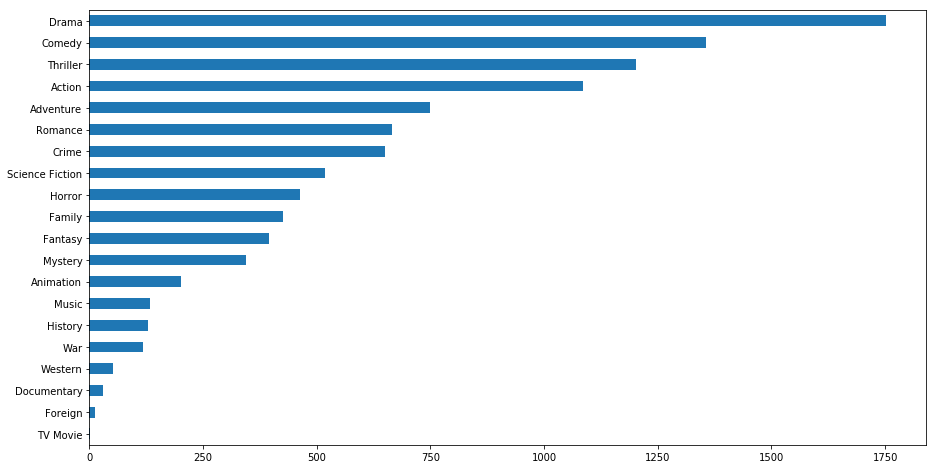

In [61]:
genre_counts.sort_values(ascending = True, inplace = True)
genre_counts.plot(kind='barh', figsize=[15,8])


### What are the most popular genre from year to year?

In [62]:
def genresByYears(year_group):
    genre_dict = {}
    
    for idx, row in year_group.iterrows():
        if pd.notnull(row['genres']):
            for g in row['genres'].split('|'):
                value = genre_dict.get(g)

                if value is None:
                    value = 1
                else:
                    value = value + 1
                 
                genre_dict[g] = value
            
    for k, v in genre_dict.items():
        value = genre_dict.get(k)
        #value = v/total_movies*100
        genre_dict[k] = value

    genre_df = pd.DataFrame([genre_dict])
    max_genre = [k for k, v in genre_dict.items() if v == max(genre_dict.values())] # getting all keys containing the `maximum`
    
    genre_df['most_popular'] = ','.join(max_genre)
    
    return genre_df

pop_genres_df = pd.DataFrame(columns=['genres'])
pop_genres_df = tmdb_df.groupby('release_year').apply(genresByYears)#lambda x: print(x[['genres','release_year']]))#[['director','cast','genres','popularity','revenue_adj']])

pop_genres_df['max_count'] = pop_genres_df.max(axis=1)
pop_genres_df.reset_index(inplace=True)
pop_genres_df.set_index(['release_year','most_popular'], inplace=True)
del pop_genres_df['level_1']

pop_genres_df.max_count

release_year  most_popular               
1960          Drama                           3.0
1961          Drama                           6.0
1962          Drama                           5.0
1963          Thriller,Drama,History          3.0
1964          Drama                           4.0
1965          Drama                           3.0
1966          Drama,Action,Adventure          2.0
1967          Drama                           7.0
1968          Drama                           6.0
1969          Adventure,Drama,Western         2.0
1970          Drama                           7.0
1971          Thriller                        8.0
1972          Drama,Crime,Thriller,Action     3.0
1973          Drama                           7.0
1974          Drama                           8.0
1975          Drama                           5.0
1976          Drama                           7.0
1977          Drama                           9.0
1978          Drama                           7.0
1979    

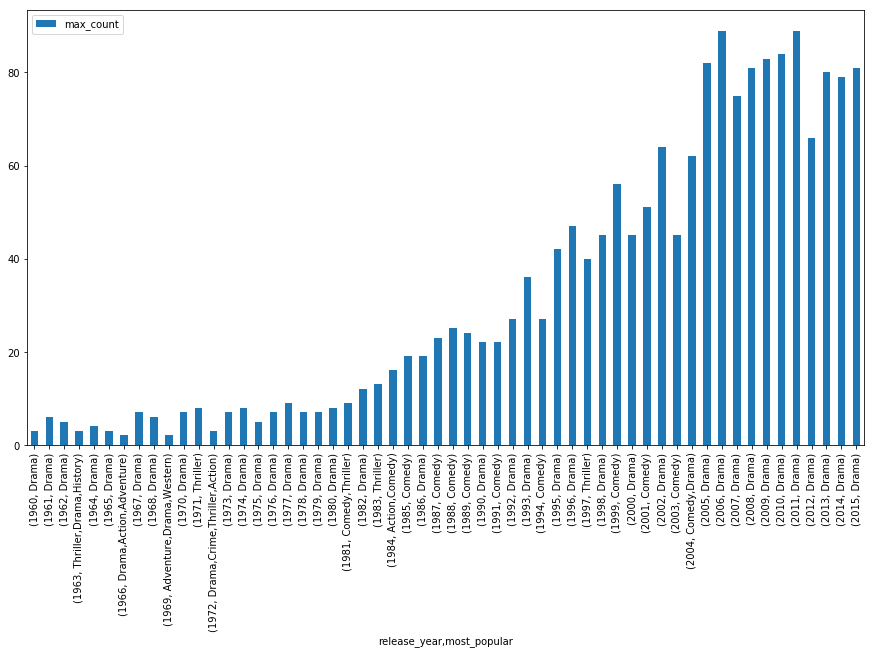

In [31]:
pop_genres_df[['max_count']].plot(kind='bar', figsize=[15,8])

### Research Question 2  Who are the most popular directors?)

In [32]:
director_counts = pd.Series(tmdb_df['director'].str.cat(sep='|').split('|')).value_counts()
display(director_counts)

Steven Spielberg               28
Clint Eastwood                 24
Ridley Scott                   21
Woody Allen                    18
Martin Scorsese                17
Robert Rodriguez               17
Tim Burton                     17
Steven Soderbergh              17
Oliver Stone                   15
Robert Zemeckis                15
Brian De Palma                 15
Renny Harlin                   15
Joel Schumacher                14
Wes Craven                     14
Ron Howard                     14
Tony Scott                     14
Richard Donner                 13
Francis Ford Coppola           13
Peter Farrelly                 13
Barry Levinson                 12
Rob Reiner                     12
Joel Coen                      12
Walter Hill                    12
John Carpenter                 12
Quentin Tarantino              12
Spike Lee                      11
Kevin Smith                    11
Michael Bay                    11
Richard Linklater              11
John Landis   

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

Overall, the most popular genres made between 1960 - 2015 is drama, followed by comedy, thriller, and action.
Drama has been dominating for 11 years straight over the past years from 2004 - 2015.


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0